# Neural Networks

План:

1. Простое введение

2. Теория

3. Backpropagation

4. Тонкости и детали

5. Имплментация

6. Обучение

7. Сравнение

## Пункт 1

Начнём с самых простых понятий.

Что такое перцептрон?

Допустим у нас стоит задача бинарной классификации и у нас есть два признака $X_1$ и $X_2$

Тогда наш перцептрон будет иметь следующий вид:

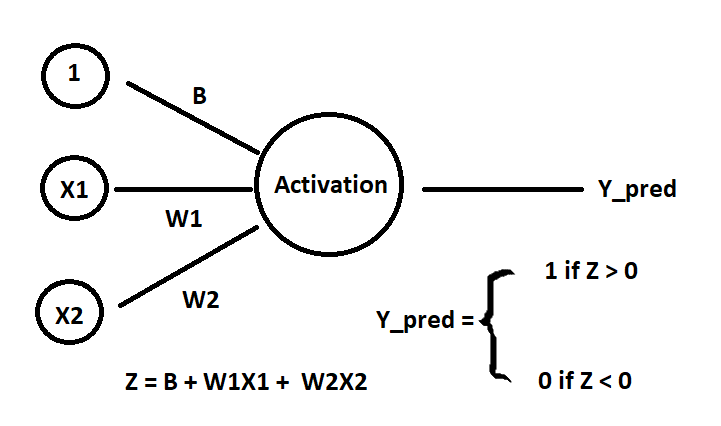

В качестве функции активации у нас выстпуает порог, попробуем преобразовать это в случай с логистической регрессией:

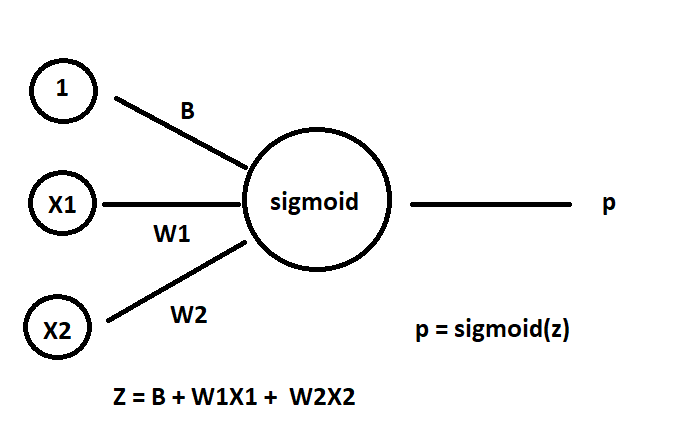

Сигмоида похожа на пороговую функцию, но её положительное отличие в том, что она непрерывна, что хорошо для дифференцирования

Что такое функции активации? Это такие функции, которые осуществляют нелинейное преобразование. В нашем случае линейное преобразование - это функция Z

В более простой схеме это выглядит следующим образом:

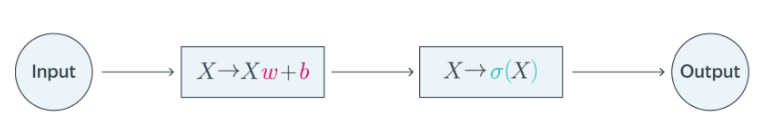

Попробуем сделать небольшую полносвязную нейронную сеть:

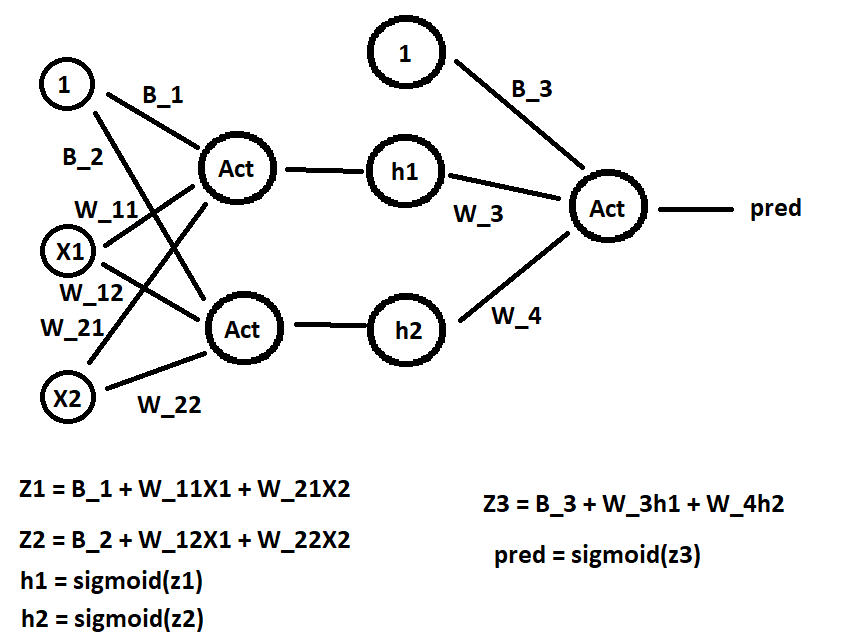

То, что в центре, - это так назывваемые скрытые слои. Стоит отметить, что h1 и h2 - это те же x1 и x2, просто прошедшие линейные и нелинейные образования. Также необязтально, чтобы в последующих слоях было столько же нейронов, сколько в предыдущих, архитектуру можно менять, увеличивая и уменьшая это количество, как и количество слоёв. 

Запишем всё в матричной форме:

$Z^{(1)} = W^{(1)}x + b^{(1)}$

$h = σ(Z^{(1)})$

$Z^{(2)} = W^{(2)}h + b^{(2)}$

$p̂ = σ(Z^{(2)})$

## Пункт 2

Капнём глубже. 

Информацию по нашей сетке может двигаться в двух направлениях:

* forwad pass
* backward pass

**Forward pass**

На этом этапе происходит преобразование исходного представления данных в целевое и последовательно строятся промежуточные (внутренние) представления данных — результаты применения слоёв к предыдущим представлениям. Именно поэтому проход называют прямым.

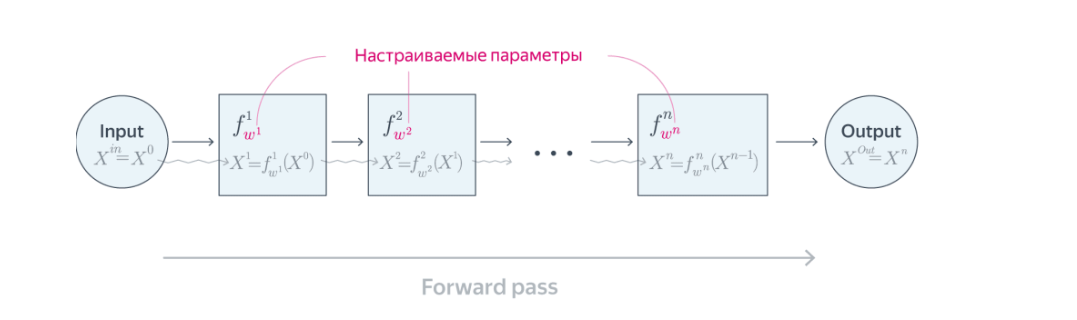

**Backward pass**

информация (обычно об ошибке предсказания целевого представления) движется от финального представления (а чаще даже от функции потерь) к исходному через все преобразования. Механизм обратного распространения ошибки играет важнейшую роль в обучении, к нему вернёмся позже.

Рассмотрим архитектуры простейших задач с помощью схем ниже:

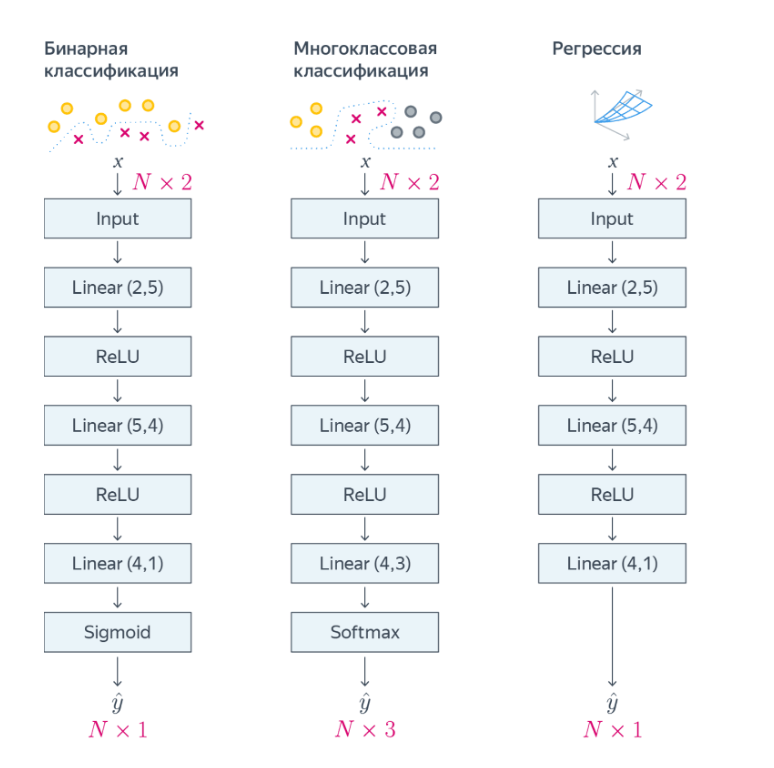

С бинарной классификацией уже разобрались. Рассмотрим многоклассовую:

Достаточно построить сеть, которая будет выдавать K неотрицательных чисел, суммирующихся в 1 (где K — число классов); тогда им можно придать смысл вероятностей классов и предсказывать тот класс, «вероятность» которого максимальна (в главе про вероятностные модели мы обсудим, почему это вовсе не обязаны быть настоящие вероятности). Превратить произвольный набор из K чисел в набор из неотрицательных чисел, суммирующихся в 1, позволяет, к примеру, функция

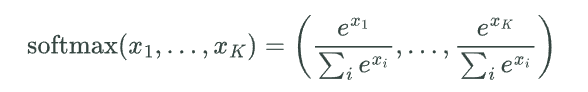

Для такой задачи функцией потерь будет выступать кросс-энтропия:

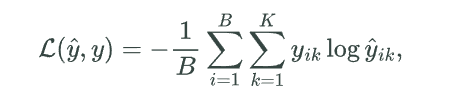

где B — размер батча, а K — число классов. Легко видеть, что при K = 2 получается та самая функция потерь, которую мы использовали для обучения бинарной классификации.

Регрессия:

С помощью нейросетей легко создать модель, которая предсказывает не одно число, а сразу несколько (например, координаты ключевых точек лица — кончика носа, уголков рта и так далее — по фотографии). Достаточно сделать, чтобы последнее представление было матрицей BxM, где B — размер батча, а M — количество предсказываемых чисел. Особенностью большинства моделей регрессии является то, что после последнего слоя (часто линейного) не ставят функций активации. В качестве функции потерь можно брать, например, MSE по всей матрице BxM.

Рассмотрим наиболее частые функции активации:

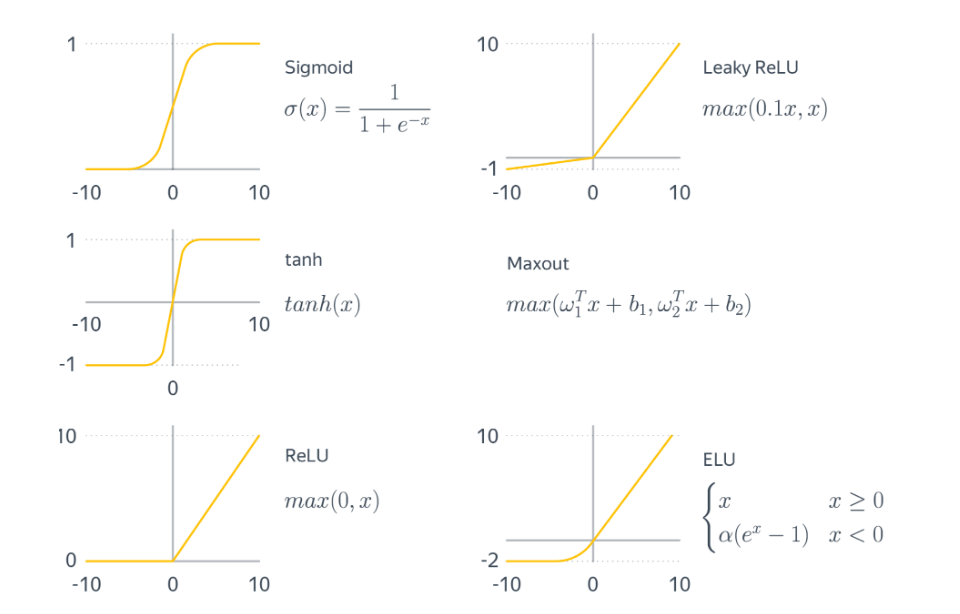

**ReLU:**

Минусы:

— область значений является смещённой относительно нуля;

— для отрицательных значений производная равна нулю, что может привести к затуханию градиента.

Плюсы:
— простота вычисления активации и производной.

**Leaky ReLU:**

Гиперпараметр $α$ обеспечивает небольшой уклон слева от нуля, что позволяет получить более симметричную относительно нуля область значений. Также меньше провоцирует затухание градиента благодаря наличию ненулевого градиента и слева, и справа от нуля.

**ELU:**

Гладкая аппроксимация ReLU. Обладает более высокой вычислительной сложностью, достаточно редко используется на практике.

**Sigmoid**:

К минусам сигмоиды можно отнести:

— область значений смещена относительно нуля;

— сигмоида (как и её производная) требует вычисления экспоненты, что является достаточно сложной вычислительной операцией. Её приближённое значение вычисляется на основе ряда Тейлора или с помощью полиномов;

— на «хвостах» обладает практически нулевой производной, что может привести к затуханию градиента;

— максимальное значение производной составляет 0.25, что также приводит к затуханию градиента.

На практике редко используется внутри сетей, чаще всего в случаях, когда внутри модели решается задача бинарной классификации (например, вероятность забывания информации в LSTM).

**Tanh:**

Плюсы:

— как и сигмоида, имеет ограниченную область значений;

— в отличие от сигмоиды, область значений симметрична.

Минусы:

— требует вычисления экспоненты, что является достаточно сложной вычислительной операцией;

— на «хвостах» обладает практически нулевой производной, что может привести к затуханию градиента.

Тонкий момент: можно задать вопрос зачем вообще нужны функции активации? Проблема в том, что они делают нелиненое преобразование. Если оставить только линейные преобразования, то получится следующее: линейная комбинация линейных отображений есть линейное отображение, то есть два последовательных линейных слоя эквивалентны одному линейному слою.

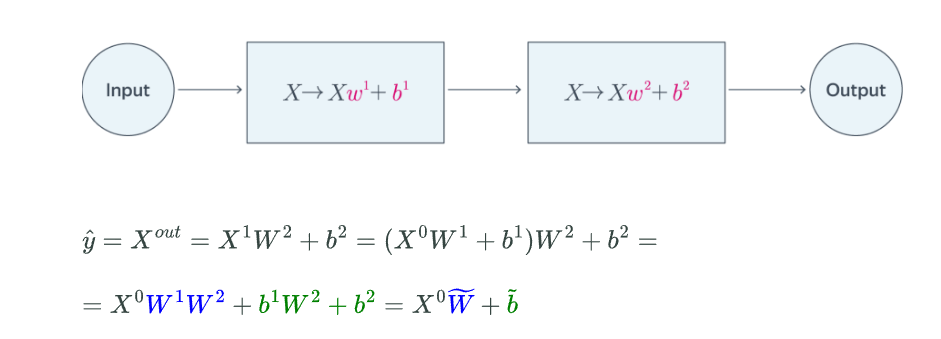

## Пункт 3

### Backward pass aka backpropagation aka метод обратного распространения ошибки

Очевидно, что нейронные сети обучаются также с помощью градиентных методов. В нейронных сетях для этого используется метод обратного распространения ошибки. Возьмём за основу пример выше:

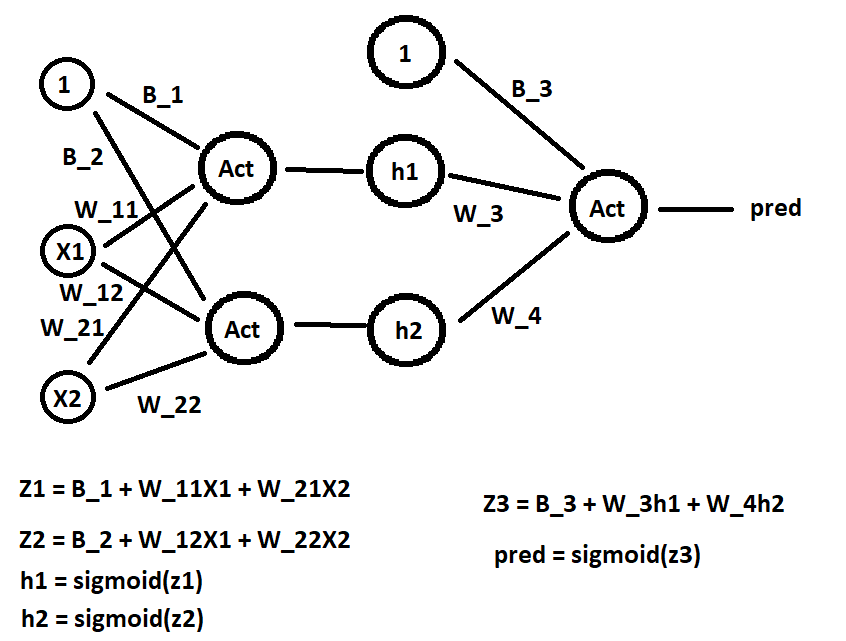

В матричной форме:

$Z^{(1)} = W^{(1)}x + b^{(1)}$

$h = σ(Z^{(1)})$

$Z^{(2)} = W^{(2)}h + b^{(2)}$

$p̂ = σ(Z^{(2)})$

Перейдём к дифференцированию:

$p = σ(x) = \frac{1}{1 + e^{-x}}$

=> $\frac{∂p}{∂x} = (1 + e^{-x})^{-2} * e^{-x} = \frac{1}{(1 + e^{-x})} * \frac{e^{-x}}{(1 + e^{-x})} = p * (1-p)$

Определим функцию потерь:

$L = \frac{1}{2} ||p - y||^2 = Σ_{i=1}^N \frac{1}{2} (p_i - y_i)$

Начнём по порядку, первым делаем посчитаем градиент для W_3:

$\frac{∂L}{∂w\_3} = \underset{FROM}{h1} \overset{w\_3}{→} \underset{TO}{p}$

$\frac{∂L}{∂w\_3} = Σ_{i=1}^N\frac{∂L_i}{∂w\_3}$

$\frac{∂L_i}{∂w\_3} = \frac{∂Z3}{∂w\_3} * \frac{∂p_i}{∂Z3} * \frac{∂L_i}{∂p_i} = h1 * p_i(1-p_i) * (p_i - y_i) = h1 * δ_{p_i}$

Теперь посчитаем градиент для W_21:

$\frac{∂L}{∂w\_21} = \underset{FROM}{X2} \overset{w\_21}{→} \underset{TO}{h1}$

$\frac{∂L_i}{∂w\_21} = \frac{∂Z1}{∂w\_21} * \frac{∂h1}{∂Z1} * \frac{∂Z3}{∂h1} * \frac{∂p_i}{∂Z3} * \frac{∂L_i}{∂p_i} = X2 * h1(1-h1) * w\_3 * p_i(1-p_i) * (p_i - y_i) = X2 * h1(1-h1) * w\_3 * δ_{p_i}$

Вот здесь и пригодится накопленная история: на предыдущем шаге мы уже находили последние два аргумента, который повторились на втором шаге. Создадим здесь тоже накполение:

$X2 * h1(1-h1) * w\_3 * δ_{p_i} = X2 * h1(1-h1) * δh1$

Также отсюда можно вынести некоторый паттерн:

$X2 * h1(1-h1) * δh1 = FROM * TO(1-TO) * δTO$

Идём дальше. Посчитаем для W_12:

$\frac{∂L}{∂w\_12} = \underset{FROM}{X1} \overset{w\_12}{→} \underset{TO}{h2}$

$\frac{∂L_i}{∂w\_12} = \frac{∂Z2}{∂w\_12} * \frac{∂h2}{∂Z2} * \frac{∂Z3}{∂h2} * \frac{∂p_i}{∂Z3} * \frac{∂L_i}{∂p_i} = X1 * h2(1-h2) * w\_4 * p_i(1-p_i) * (p_i - y_i) = X2 * h2(1-h2) * w\_4 * δ_{p_i} = X1 * h2(1-h2) * δh2 = FROM * TO(1-TO) * δTO$

**Backpropagation в одномерном случае**

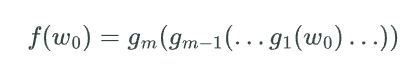

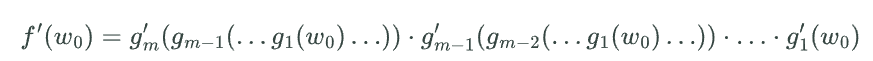

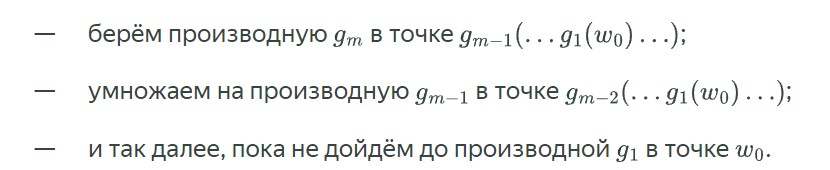

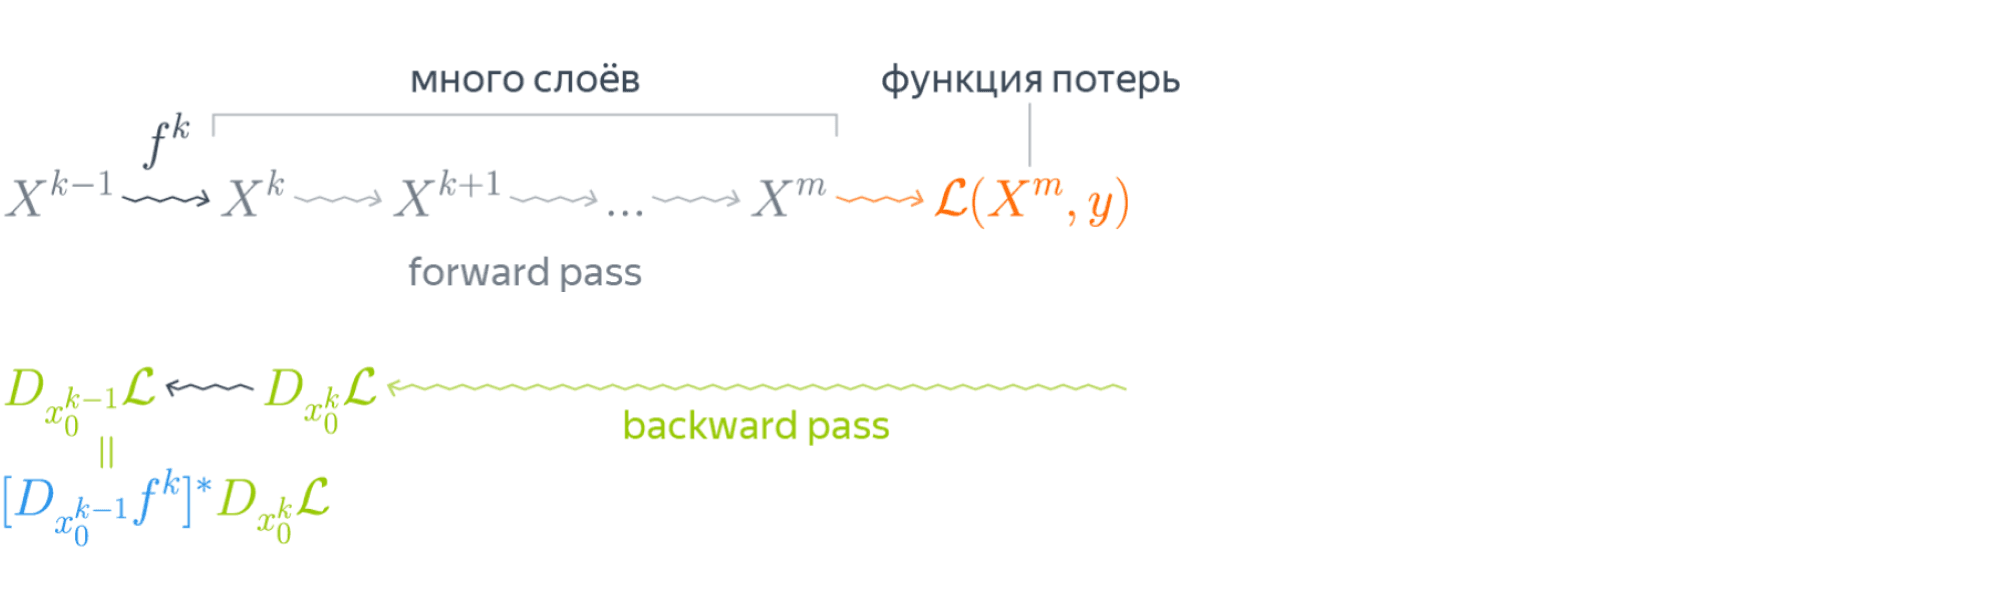

## Пункт 4

Здесь поговорим о деталях и тонкостях

**1. Как инициализировать веса?**



*   Нулём или константой

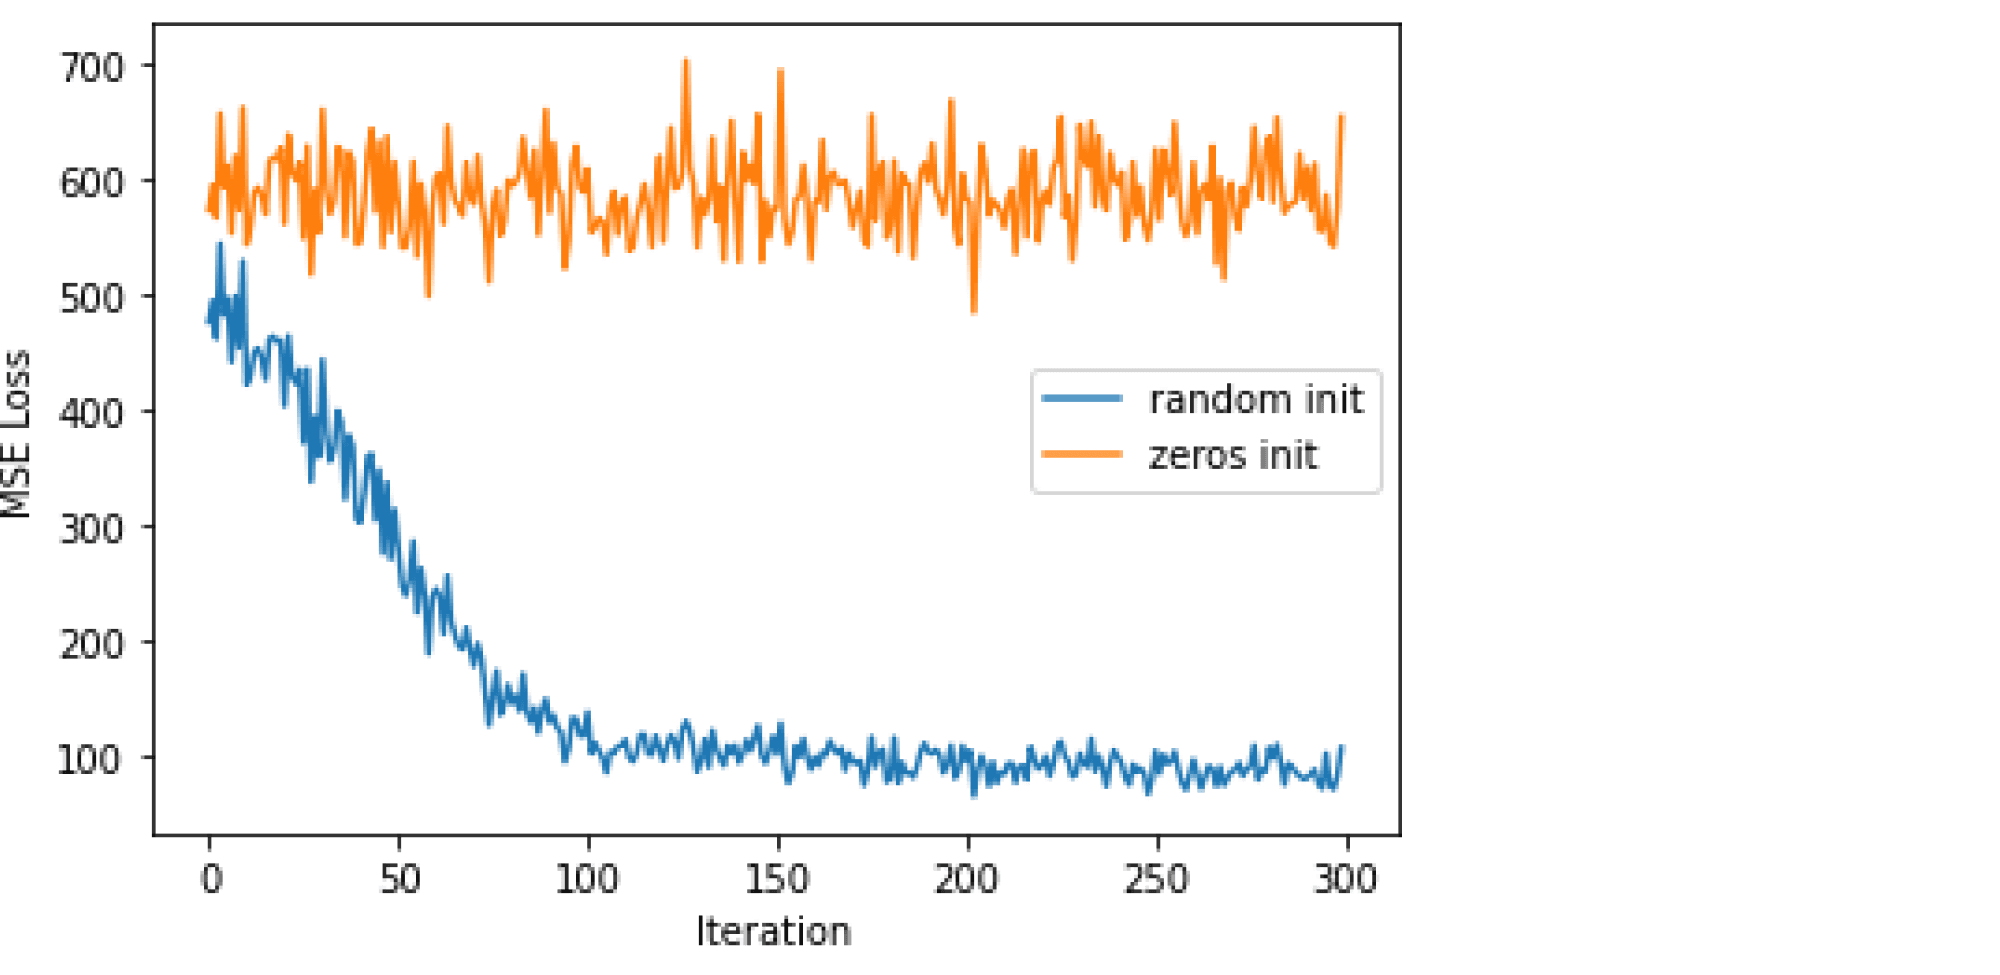

*   случайными числами: для начальной инициализации весов имеет смысл использовать распределение, дисперсия которого позволила бы сохранить дисперсию результата. Например, $∀ i, w_i \sim N(0, \frac{1}{n_{in}})$ или же в общем случае $∀ i, Var(w_i) = \frac{1}{n_{in}}$, где $n_{in}$ - размерность

*   Xavier & Normalized Xavier initialization



**2. Регуляризация**



*   через функцию потерь (Weight Decay), то же самое что и в регресии

*   через ограничения структуры модели:

  1. Dropout: случайным образом выключаем нейроны. Тогда при выключении «полезных» координат произойдёт резкое изменение предсказаний модели, что приведёт к увеличению ошибки, а полученные градиенты этой ошибки укажут, как её исправить с использованием (и изменением) других координат.

  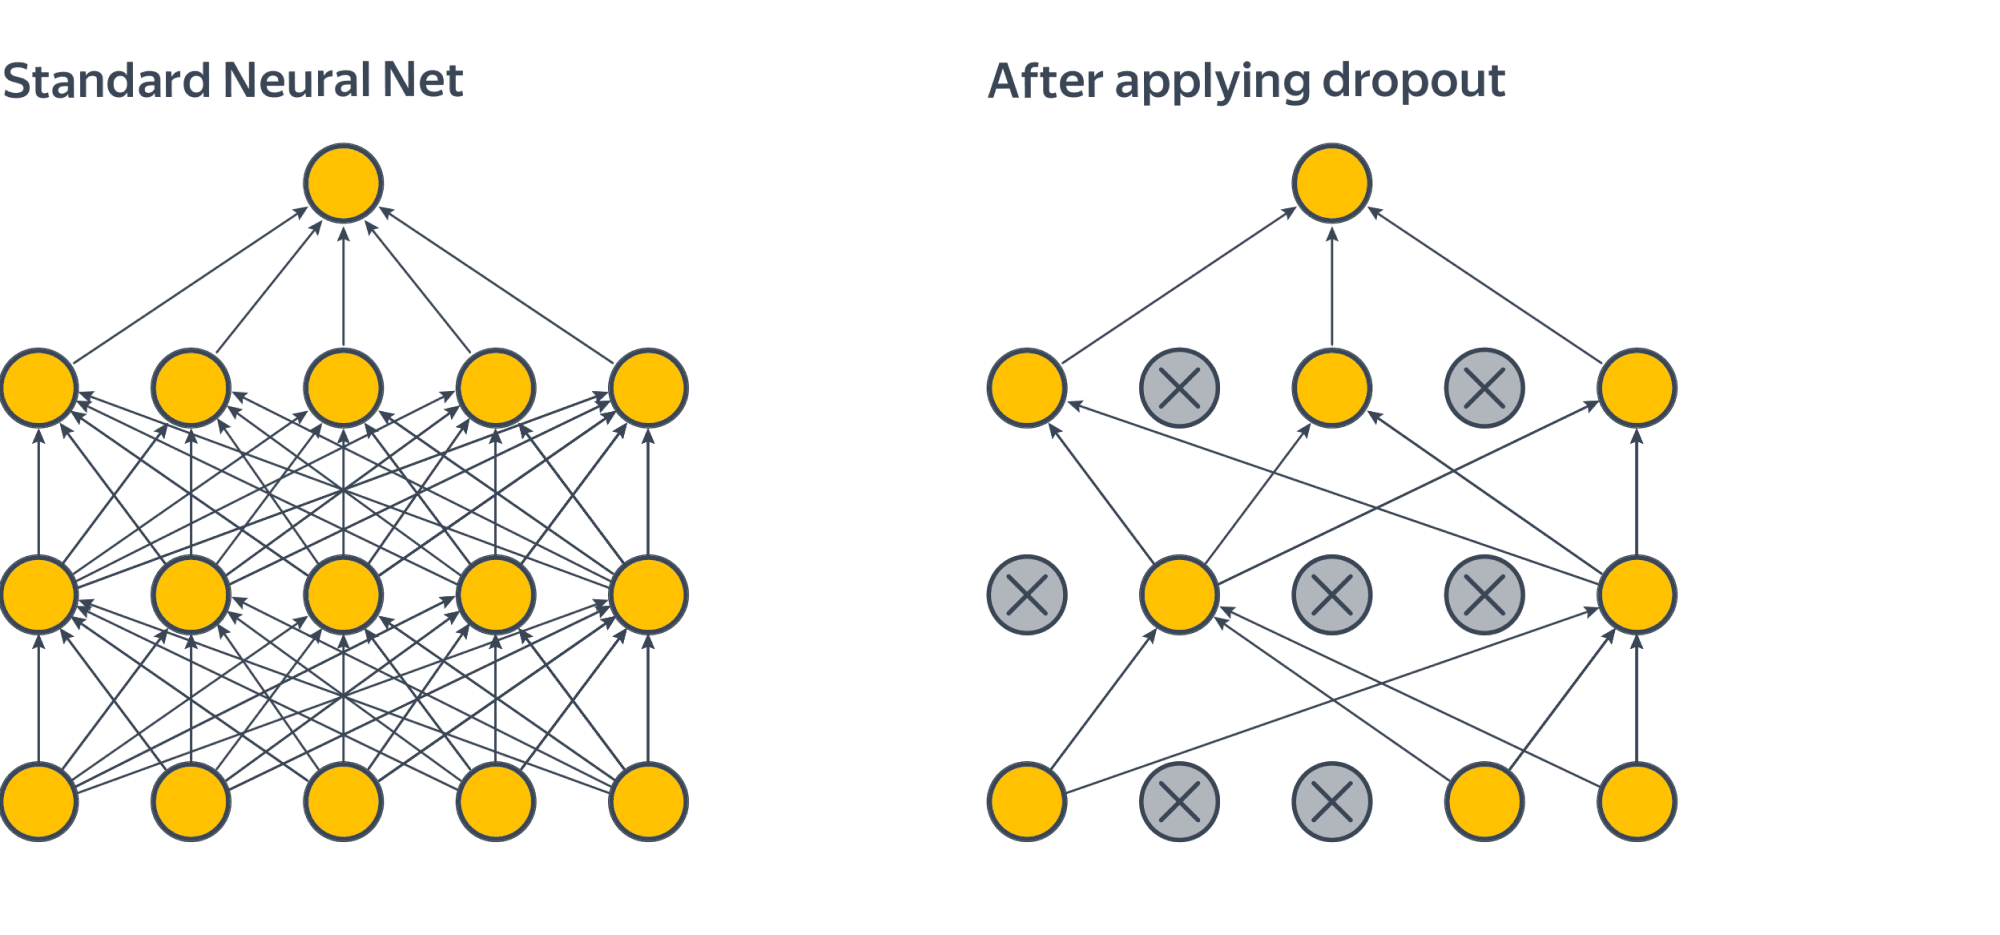

  2. Batch normalization: Использование batch normalization гарантирует, что каждая компонента представления на выходе будет иметь контролируемое среднее и дисперсию. Достигается это следующим образом: сперва идёт собственно слой batch normalization, на котором текущий батч приводится к нулевому среднему и единичной дисперсии:
  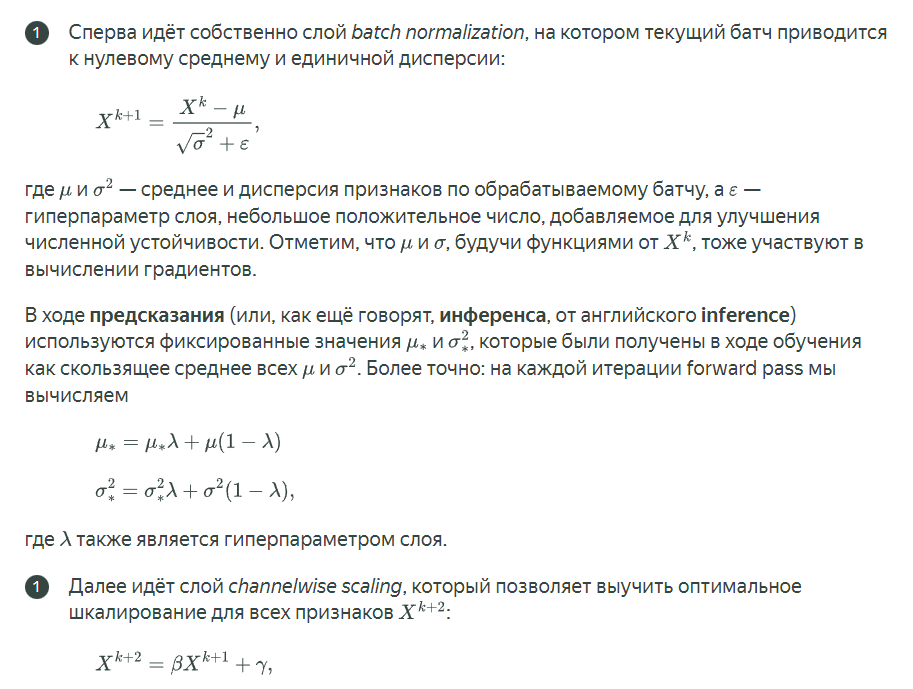






## Пункт 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class FCLayer:

    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [3]:
class ActivationLayer:
  
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(input)
    
    def backward(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))

def sse_prime(y_true, y_pred):
    return y_pred - y_true

In [5]:
class SoftmaxLayer:
  
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

## Пункты 6-7

In [6]:
import os
from torchvision.datasets import MNIST
from torchvision import transforms as tfs
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader


data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

train_dataloader = DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2)
valid_dataloader = DataLoader(val_dataset, batch_size=100, shuffle=False, num_workers=2)

100%|██████████| 9912422/9912422 [00:00<00:00, 188523763.99it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 107964076.49it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 62062668.45it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17672104.61it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [7]:
examples = enumerate(valid_dataloader)
batch_idx, (example_data, example_targets) = next(examples)

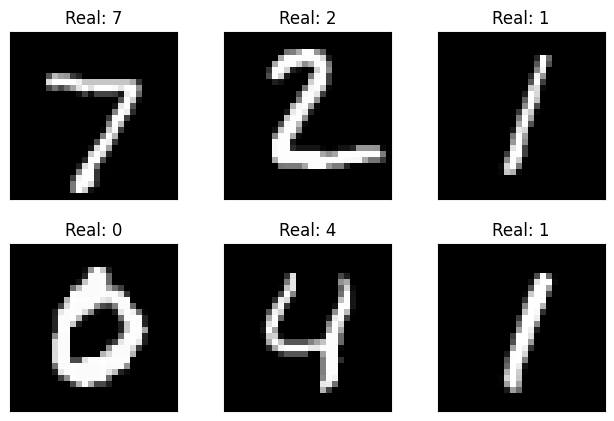

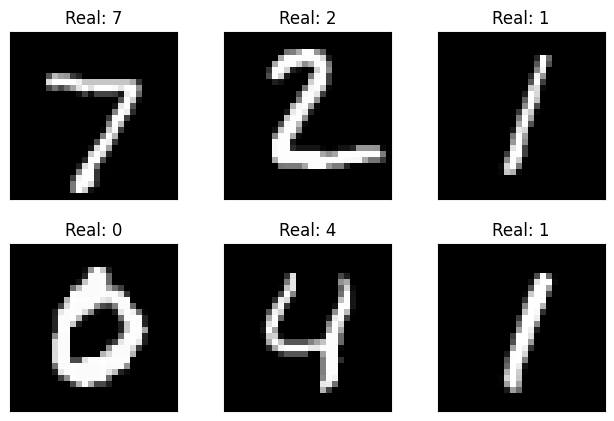

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Real: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [9]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train[0:1000]
y_train = y_train[0:1000]

x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

11490434/11490434 [==============================] - 1s 0us/step


In [10]:
network = [
    FCLayer(28 * 28, 100),
    ActivationLayer(relu, relu_prime),
    FCLayer(100, 50),
    ActivationLayer(relu, relu_prime),
    FCLayer(50, 10),
    SoftmaxLayer(10)
]

epochs = 50
learning_rate = 0.1

for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train, y_train):
        output = x
        for layer in network:
            output = layer.forward(output)
      
        error += mse(y_true, output)

        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    
    error /= len(x_train)
    print(f'Epoch = {epoch+1}, error = {error}')

Epoch = 1, error = 0.08569076574872904
Epoch = 2, error = 0.05379574398384452
Epoch = 3, error = 0.031734020642316736
Epoch = 4, error = 0.021838648249949296
Epoch = 5, error = 0.016574804767426846
Epoch = 6, error = 0.013237344579795689
Epoch = 7, error = 0.010656950846369626
Epoch = 8, error = 0.008986364947364878
Epoch = 9, error = 0.007591225048108095
Epoch = 10, error = 0.0060223332770824875
Epoch = 11, error = 0.005186324546401962
Epoch = 12, error = 0.004494822342379067
Epoch = 13, error = 0.003857790783341881
Epoch = 14, error = 0.0033933781154073662
Epoch = 15, error = 0.0033471341503926973
Epoch = 16, error = 0.0031555766053366578
Epoch = 17, error = 0.002616570111494135
Epoch = 18, error = 0.0022594618078793727
Epoch = 19, error = 0.0019547023369217236
Epoch = 20, error = 0.0018208774490483257
Epoch = 21, error = 0.001718681411725003
Epoch = 22, error = 0.0016221844342908097
Epoch = 23, error = 0.0014952518492252075
Epoch = 24, error = 0.001468541137360119
Epoch = 25, error 

In [11]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

ratio = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print('ratio: %.2f' % ratio)
print('mse: %.4f' % error)

ratio: 0.87
mse: 0.0204


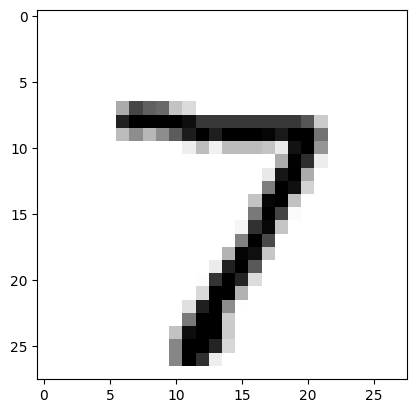

pred: 7, prob: 0.9998966951617173, true: 7


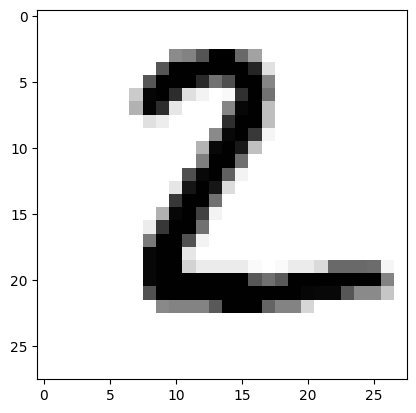

pred: 2, prob: 0.809248510989203, true: 2


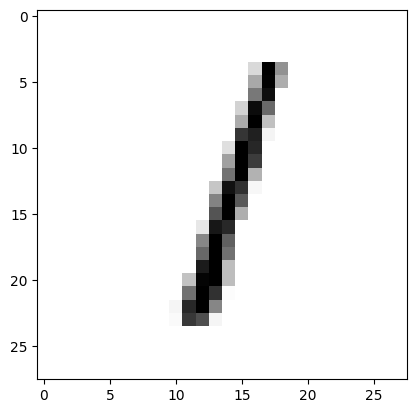

pred: 1, prob: 0.9946574109333574, true: 1


In [12]:
import matplotlib.pyplot as plt

samples = 3
for test, true in zip(x_test[:samples], y_test[:samples]):
    image = np.reshape(test, (28, 28))
    plt.imshow(image, cmap='binary')
    plt.show()
    pred = predict(network, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    print(f'pred: {idx}, prob: {pred[idx]}, true: {idx_true}')

**Сравним с Torch**

In [13]:
activation = nn.ELU

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    activation(),
    nn.Linear(128, 128),
    activation(),
    nn.Linear(128, 10)
)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

loaders = {"train": train_dataloader, "valid": valid_dataloader}

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
max_epochs = 10
accuracy = {"train": [], "valid": []}
for epoch in range(max_epochs):
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0
        for x_batch, y_batch in dataloader:
            if k == "train":
                model.train()
                optimizer.zero_grad()
                outp = model(x_batch)
            else: 
                model.eval()
                with torch.no_grad():
                    outp = torch.softmax(model(x_batch), dim=1)
            preds = outp.argmax(-1)
            correct = (preds == y_batch).sum()
            all = len(preds)
            epoch_correct += correct.item()
            epoch_all += all
            if k == "train":
                loss = criterion(outp, y_batch)
                loss.backward()
                optimizer.step()
        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.9563166666666667
Loader: valid. Accuracy: 0.9533
Epoch: 2
Loader: train. Accuracy: 0.9675666666666667
Loader: valid. Accuracy: 0.9673
Epoch: 3
Loader: train. Accuracy: 0.9727166666666667
Loader: valid. Accuracy: 0.9719
Epoch: 4
Loader: train. Accuracy: 0.97735
Loader: valid. Accuracy: 0.9641
Epoch: 5
Loader: train. Accuracy: 0.9797
Loader: valid. Accuracy: 0.9734
Epoch: 6
Loader: train. Accuracy: 0.9823
Loader: valid. Accuracy: 0.9741
Epoch: 7
Loader: train. Accuracy: 0.9836666666666667
Loader: valid. Accuracy: 0.9736
Epoch: 8
Loader: train. Accuracy: 0.9853666666666666
Loader: valid. Accuracy: 0.978
Epoch: 9
Loader: train. Accuracy: 0.98725
Loader: valid. Accuracy: 0.9724
Epoch: 10
Loader: train. Accuracy: 0.9884833333333334
Loader: valid. Accuracy: 0.9739
